In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

<img src="../input/jerarquico.png">

# Importación de datos

In [5]:
data = pd.read_csv('datos limpios')
data.head()

,Unnamed: 0,DBO5,DEPURADORA,MONTH,NT,PRUEBA,PT,SS,YEAR,DEPURADORA_2,MONTH_2,DATE
0,0,5.0,VIV,enero,15.8,1.0,0.91,5.0,2017.0,0,1,2017-1-1
1,1,5.0,VIV,enero,14.9,2.0,0.84,4.0,2017.0,0,1,2017-1-2
2,2,5.0,VIV,febrero,9.8,1.0,0.63,3.0,2017.0,0,2,2017-2-1
3,3,5.0,VIV,febrero,7.0,2.0,0.67,3.0,2017.0,0,2,2017-2-2
4,4,5.0,VIV,marzo,9.7,1.0,0.85,4.0,2017.0,0,3,2017-3-1


# Tratando datos para el dendograma

In [6]:
data_2=data.drop(columns=['PRUEBA','Unnamed: 0', 'YEAR', 'DEPURADORA','MONTH_2','DATE','MONTH'], axis=1)
data_2.head()

,DBO5,NT,PT,SS,DEPURADORA_2
0,5.0,15.8,0.91,5.0,0
1,5.0,14.9,0.84,4.0,0
2,5.0,9.8,0.63,3.0,0
3,5.0,7.0,0.67,3.0,0
4,5.0,9.7,0.85,4.0,0


In [7]:
data_3=data_2.drop(columns=['DEPURADORA_2'])
data_3.head()

,DBO5,NT,PT,SS
0,5.0,15.8,0.91,5.0
1,5.0,14.9,0.84,4.0
2,5.0,9.8,0.63,3.0
3,5.0,7.0,0.67,3.0
4,5.0,9.7,0.85,4.0


# Cluster jerárquico (dendrograma)

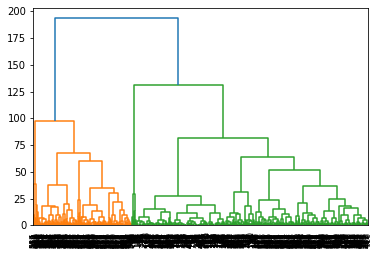

In [8]:
#Se crea una matriz de conexion(usa el método ward  para agrupar los cluster,para realizar
#la agrupación se basa en la distancia Euclidea):

cluster_jerarquico=linkage(data_3, 'ward')
dendrogram(cluster_jerarquico, leaf_rotation=90., leaf_font_size=8.)
plt.show();

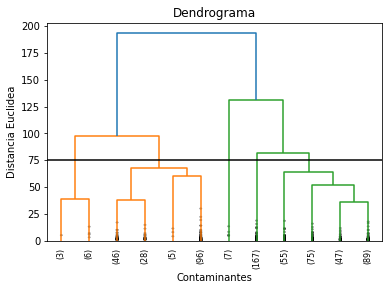

In [9]:
dendrogram(cluster_jerarquico, truncate_mode='lastp', p=12,
           leaf_rotation=90., leaf_font_size=8.,
           show_contracted=True, show_leaf_counts=True)
plt.title('Dendrograma')
plt.xlabel('Contaminantes')
plt.ylabel('Distancia Euclidea')
max_d = 75
plt.axhline(y=max_d, c='k')
plt.show();

El número de cluster,correspondeŕa con el valor medio de la máxima distancia,en este caso sera 75.Se traza una linea horizontal para determinar el número de cluster que hay,que será el número de lineas verticales con el que corte nuestra linea horizontal,en este caso es 5.

In [10]:
hc=AgglomerativeClustering(n_clusters=5,
                          affinity='euclidean',
                          linkage='ward')
y_hc=hc.fit_predict(data_3)

In [11]:
data_2['Cluster']=hc.labels_
data_2.head()

,DBO5,NT,PT,SS,DEPURADORA_2,Cluster
0,5.0,15.8,0.91,5.0,0,1
1,5.0,14.9,0.84,4.0,0,1
2,5.0,9.8,0.63,3.0,0,4
3,5.0,7.0,0.67,3.0,0,4
4,5.0,9.7,0.85,4.0,0,4


# Análisis datos en función de los clusters

Se observan valores muy parecidos en el caso del NT en los casos de los grupos 0 y 3,pudiendo llegar a confundirse.

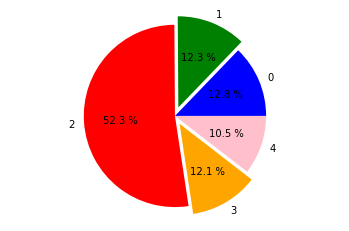

In [12]:
nitrogeno = [11.096092, 10.659237, 45.318182, 10.518978, 9.075610]
cluster = ['0', '1', '2', '3', '4']
colores = ["blue","green","red","orange","pink"]
desfase = (0, 0.1, 0, 0.1, 0)
plt.pie(nitrogeno, labels=cluster,autopct="%0.1f %%", colors=colores, explode=desfase)
plt.axis("equal")
plt.show()


In [13]:
data_2.groupby(['Cluster'])['NT'].mean()

Cluster
0    11.096092
1    10.659237
2    45.318182
3    10.518978
4     9.075610
Name: NT, dtype: float64

En el caso del P se observa que los valores del grupo 2 y 4 son muy parecidos,por lo que en este caso tambín se podría generar una confusión entre ambos.

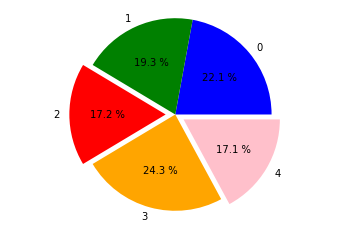

In [14]:
fosforo = [0.691114, 0.602797, 0.537143, 0.760000, 0.534263]
cluster = ['0', '1', '2', '3', '4']
colores = ["blue","green","red","orange","pink"]
desfase = (0, 0, 0.1, 0, 0.1)
plt.pie(fosforo, labels=cluster,autopct="%0.1f %%", colors=colores, explode=desfase)
plt.axis("equal")
plt.show()


In [15]:
data_2.groupby(['Cluster'])['PT'].mean() 

Cluster
0    0.691114
1    0.602797
2    0.537143
3    0.760000
4    0.534263
Name: PT, dtype: float64

Tanto en el caso de los SS(solidos en suspensión ) como en el de DBO5, los grupos estan bien diferenciados. 

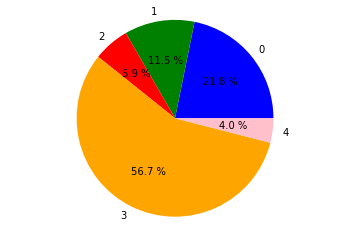

In [16]:
solidos = [14.742857, 7.779323, 4.00000, 38.333333, 2.701796]
cluster = ['0', '1', '2', '3', '4']
colores = ["blue","green","red","orange","pink"]
desfase = (0, 0, 0, 0, 0)
plt.pie(solidos, labels=cluster,autopct="%0.1f %%", colors=colores, explode=desfase)
plt.axis("equal")
plt.show()


In [17]:
data_2.groupby(['Cluster'])['SS'].mean() 

Cluster
0    14.742857
1     7.779323
2     4.000000
3    38.333333
4     2.701796
Name: SS, dtype: float64

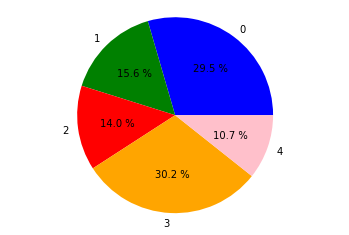

In [18]:
dbo_5 = [12.051429, 6.392105, 5.714286, 12.333333, 4.362275]
cluster = ['0', '1', '2', '3', '4']
colores = ["blue","green","red","orange","pink"]
desfase = (0, 0, 0, 0, 0)
plt.pie(dbo_5, labels=cluster,autopct="%0.1f %%", colors=colores, explode=desfase)
plt.axis("equal")
plt.show()

In [19]:
data_2.groupby(['Cluster'])['DBO5'].mean() 

Cluster
0    12.051429
1     6.392105
2     5.714286
3    12.333333
4     4.362275
Name: DBO5, dtype: float64

# Representación cluster obtenidos

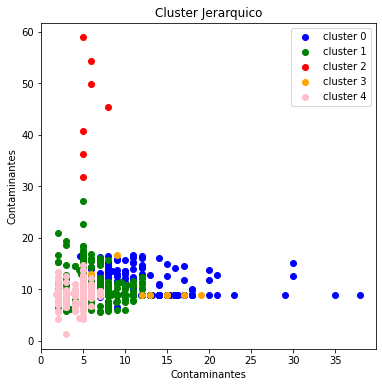

In [20]:
x=data_3.iloc[:, [0, 1, 2, 3]].values
fig=plt.figure(figsize= (6,6))
ax =fig.add_subplot(1, 1, 1)
plt.scatter(x[y_hc==0, 0], x[y_hc==0, 1], c='blue', label='cluster 0')
plt.scatter(x[y_hc==1, 0], x[y_hc==1, 1], c='green', label='cluster 1')
plt.scatter(x[y_hc==2, 0], x[y_hc==2, 1], c='red', label='cluster 2')
plt.scatter(x[y_hc==3, 0], x[y_hc==3, 1], c='orange', label='cluster 3')
plt.scatter(x[y_hc==4, 0], x[y_hc==4, 1], c='pink', label='cluster 4')
plt.title("Cluster Jerarquico")
plt.xlabel('Contaminantes')
plt.ylabel('Contaminantes')
plt.legend()
plt.show()



In [23]:
data_2.to_csv('jerarquico_cluster')